In [362]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.stats import ttest_1samp, ttest_ind, ttest_ind_from_stats # Numeric Vs Categorical
from statsmodels.graphics.gofplots import qqplot # quantile

# 1.Define Problem Statement and perform Exploratory Data Analysis -
## Definition of problem (as per given problem statement with additional views)-
#### In the given problem we have to use tools of statistics to know how the demand of the bike is effected by differnet factors like - weather, season, working days , holidays etc. As, Yulu has recently suffered considerable dips in its revenues so we have to provide some insights  so that it will help the company to increase the revenue.
## Observations on shape of data, data types of all the attributes, conversion of categorical attributes to 'category' (If required) , missing value detection, statistical summary.-

In [2]:
data = pd.read_csv("Desktop/bike_sharing.csv")

In [4]:
data.shape

(10886, 12)

In [6]:
data.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

In [35]:
data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [80]:
data.dtypes                # insight- need to change th datetime format.

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object

In [213]:
data['datetime']=pd.to_datetime(data['datetime'])   # converted datetime to column to datetime format
data['date']= data['datetime'].dt.date              # made another column of only date of the day.

In [214]:
data.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [121]:
data['date'].nunique()       #  insight-given data is for 456 days.

456

In [216]:
data_date =  data.groupby(['date','season','holiday','workingday'])[['temp','atemp','humidity','windspeed','casual','registered','count']].aggregate({'temp':np.mean,'atemp':np.mean,'humidity':np.mean,'windspeed':np.mean,'casual':'sum','registered':'sum','count':'sum'}).reset_index()
# here we grouped the data by date and take mean of temp,atemp,humidity,windspeed and sum of casual,registered and count.
data_date

,date,season,holiday,workingday,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01,1,0,0,14.110833,18.181250,80.583333,10.749871,331,654,985
1,2011-01-02,1,0,0,14.902609,17.686957,69.608696,16.652122,131,670,801
2,2011-01-03,1,0,1,8.050909,9.470227,43.727273,16.636709,120,1229,1349
3,2011-01-04,1,0,1,8.200000,10.606087,59.043478,10.739809,108,1454,1562
4,2011-01-05,1,0,1,9.305217,11.463478,43.695652,12.522300,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...
451,2012-12-15,4,0,0,13.290833,16.919167,65.041667,7.125450,767,4280,5047
452,2012-12-16,4,0,0,14.862500,18.496875,83.875000,6.749692,538,3248,3786
453,2012-12-17,4,0,1,16.126667,20.075000,90.708333,6.583308,212,4373,4585
454,2012-12-18,4,0,1,16.844167,20.485417,66.625000,14.834079,433,5124,5557


In [215]:
data.isnull().sum()          # insight - no null values in the data.

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
date          0
dtype: int64

## Univariate Analysis (distribution plots of all the continuous variable(s) barplots/countplots of all the categorical variables)-

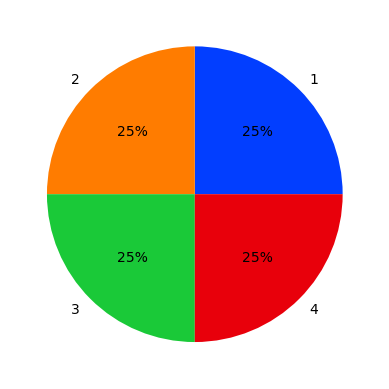

In [124]:
season_proportion =data_date['season'].value_counts(normalize = True)*100
keys = season_proportion.index
palette_color = sns.color_palette('bright')
plt.pie(season_proportion, labels=keys, colors=palette_color, autopct='%.0f%%')
plt.show()

### INSIGHT - All seasons have equal proportion of data.

<AxesSubplot:xlabel='count', ylabel='holiday'>

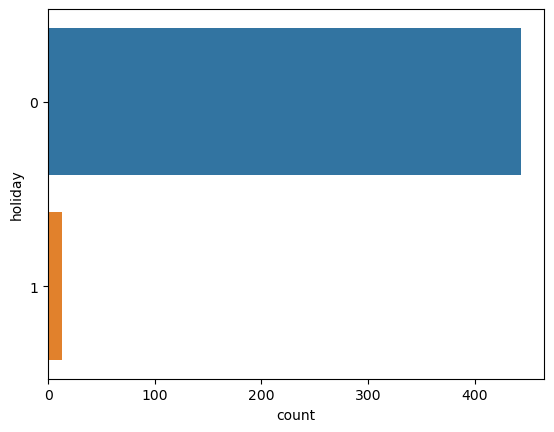

In [221]:
sns.countplot(data = data_date, y = 'holiday')

#### Insight - in the data of 456 day there are less than 25 holidays.

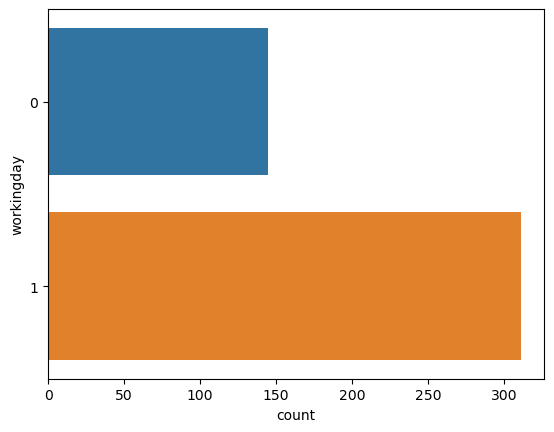

In [225]:
sns.countplot(data= data_date, y= 'workingday')
plt.show()

#### Insight - one third of the days are non - working days.

<AxesSubplot:xlabel='count', ylabel='weather'>

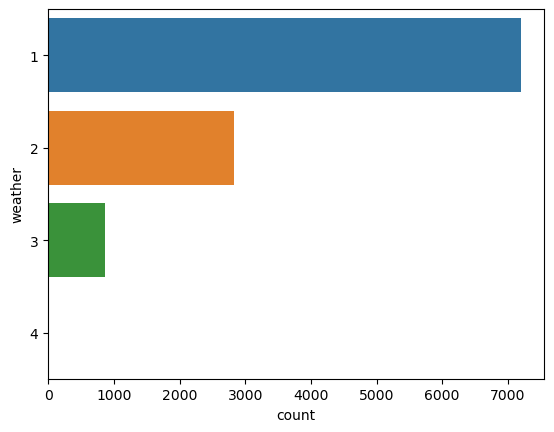

In [230]:
sns.countplot(data = data, y = 'weather')

#### Insight - Most of the times the weather is Clear, Few clouds, partly cloudy, partly cloudy.

In [231]:
data['weather'].value_counts()

1    7192
2    2834
3     859
4       1
Name: weather, dtype: int64

#### Insight - There is only one timestamp in the data when the weather is Heavy Rain or Ice Pallets or Thunderstorm or Mist, Snow or Fog.

<AxesSubplot:xlabel='temp', ylabel='Density'>

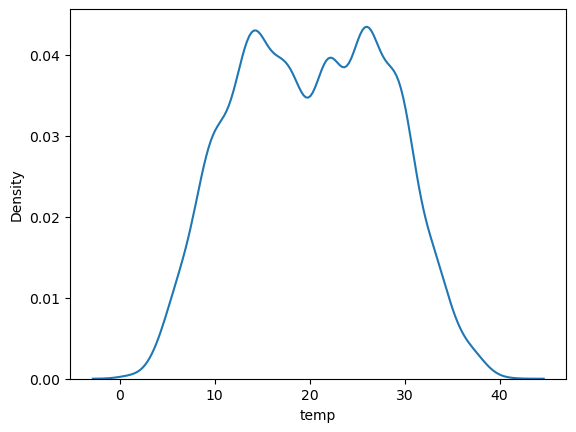

In [242]:
sns.kdeplot(data= data, x = 'temp')

<AxesSubplot:xlabel='atemp', ylabel='Density'>

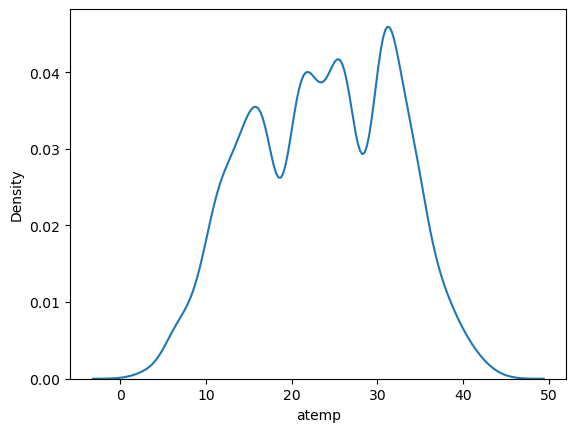

In [244]:
sns.kdeplot(data = data,x = 'atemp')

<AxesSubplot:xlabel='humidity', ylabel='Density'>

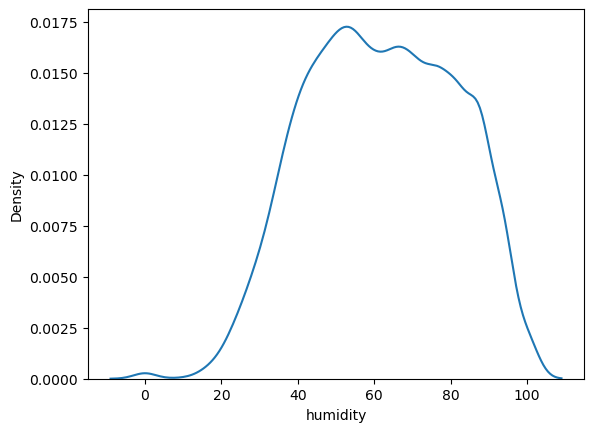

In [246]:
sns.kdeplot(data = data, x = 'humidity')

<AxesSubplot:xlabel='windspeed', ylabel='Density'>

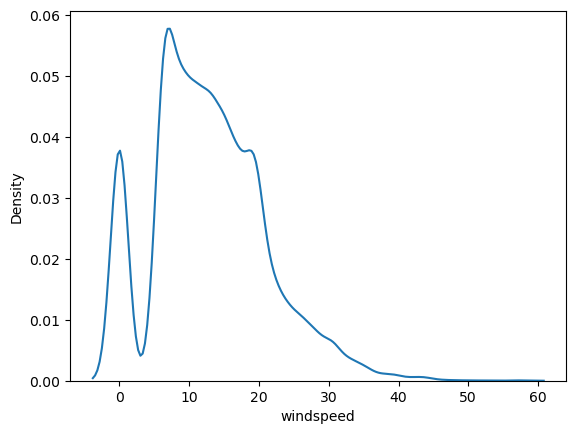

In [248]:
sns.kdeplot(data = data, x = 'windspeed')

## Bivariate Analysis (Relationships between important variables such as workday and count, season and count, weather and count.)

<AxesSubplot:xlabel='workingday', ylabel='count'>

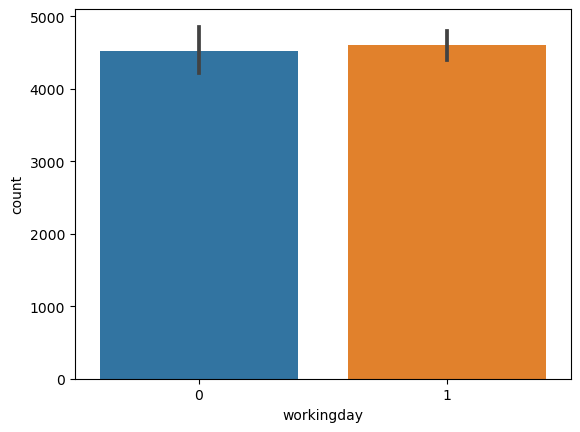

In [258]:
sns.barplot(data = data_date, x = 'workingday', y = 'count',estimator = np.mean)

#### Insight - As we can see that mean of count for both working day and non working day is approximately same. Therefor we will use hypothesis testing to prove it further.

<AxesSubplot:xlabel='season', ylabel='count'>

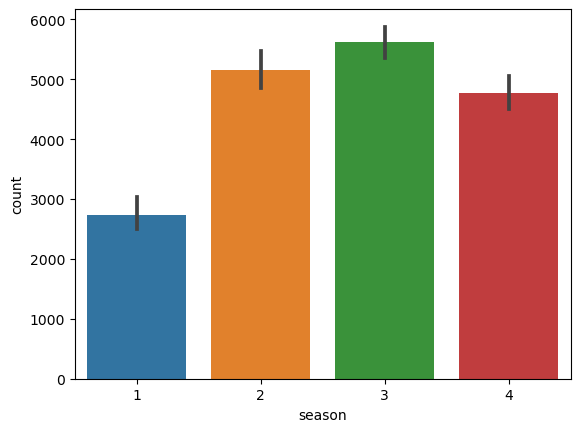

In [259]:
sns.barplot(data = data_date, x = 'season', y = 'count',estimator = np.mean)

#### Insight - As we can see that mean of count for season -1 is very less as compared to other seasons. Therefor we will use hypothesis testing to prove it statistically.

<AxesSubplot:xlabel='weather', ylabel='count'>

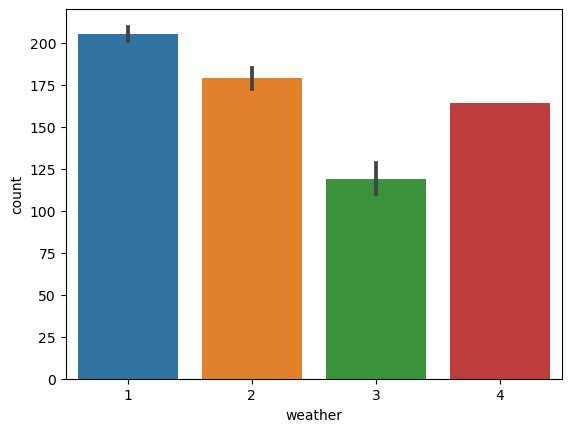

In [261]:
sns.barplot(data = data, x = 'weather', y = 'count')

#### Insight - weather - 3 which is Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds has least mean value of count  . we will prove it statistically further.

# 2.Hypothesis testing. 

## 2- Sample T-Test to check if Working Day has an effect on the number of electric cycles rented 

In [130]:
data_date.groupby(data_date['workingday'])['count'].sum()

workingday
0     654872
1    1430604
Name: count, dtype: int64

In [394]:
workday_data= data_date[data_date['workingday']==1]['count']
nonworkday_data = data_date[data_date['workingday']==0]['count']

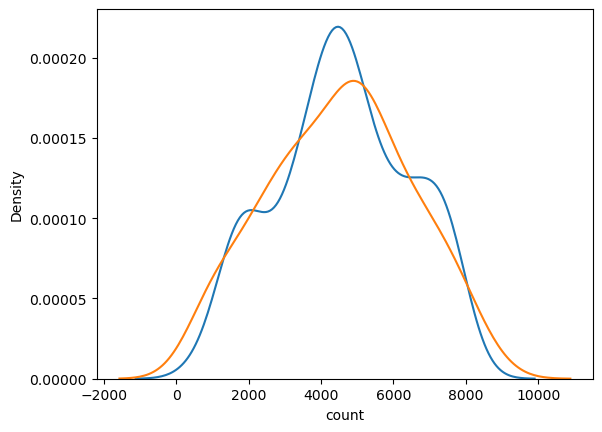

In [396]:
sns.kdeplot(data = workday_data)
sns.kdeplot(data = nonworkday_data)
plt.show()

#### We can not say from the plot that data is gaussian or not . Therefore we will do another tests.

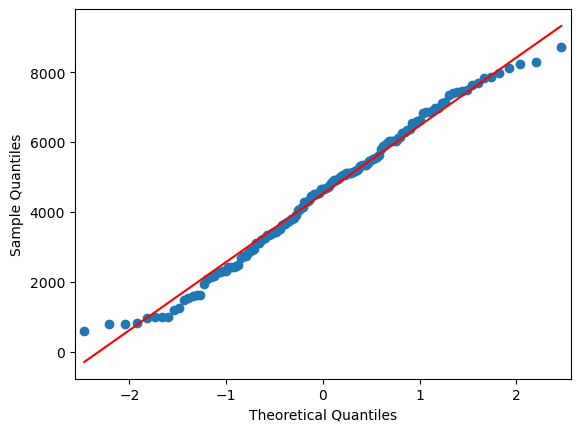

In [398]:
qqplot(nonworkday_data, line="s") # qq plot for non  workin day count data.
plt.show()

#### We can conclude from the upper plot that the data is gaussina.

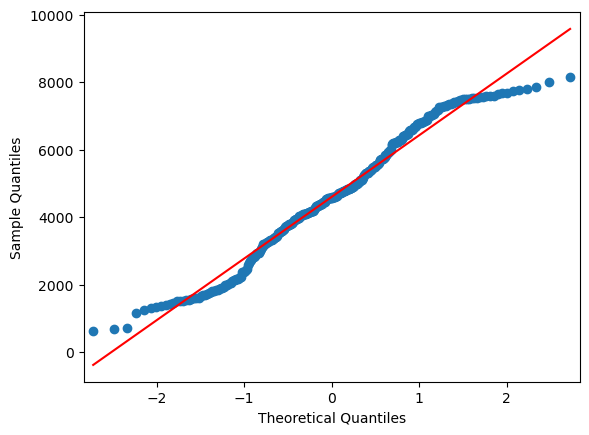

In [263]:
qqplot(workday_data, line="s") # qq plot for working day count data.
plt.show()

#### We can see that the plot of data is diverting from ideal gaussian plot. Therefore we can conclude that the data is not Gaussian. Now we will check by doing different tests.

In [360]:
from scipy.stats import shapiro, kstest # To check Gaussian
workday_subset = workday_data.sample(100)  # Shapiro is best in the 50 to 200 range
# H0: Data is Gaussian
# Ha: Data is not Gaussian
test_stat, p_value = shapiro(workday_subset)
print(p_value)
if p_value < 0.05:
    print("Reject H0")
    print("Data is not Gaussian")
else:
    print("Fail to reject H0")
    print("Data is Gaussian")

0.01000186987221241
Reject H0
Data is not Gaussian


#### By doing shapiro test we concluded that data is not gaussian. Now we will compare the variance of the distributions.

In [383]:
from scipy.stats import levene
# H0: same variance
# Ha: variance is different
test_stat, p_value = levene(workday_data,nonworkday_data)
print(p_value)
if p_value < 0.05:
    print("Reject H0")
    print("Variances are different")
else:
    print("Fail to reject H0")
    print("Variances are the same")

0.28003858261286085
Fail to reject H0
Variances are the same


#### It is clear from the test that the two distributions have approximately equal variance.

In [457]:
print(workday_data.mean(), nonworkday_data.mean())  # it can  be seen that the mean of both the data have very less difference.

4600.012861736334 4516.358620689655


#### Now to do the ttest we will assume that the data is gaussian.

In [406]:
# H0: mu1 = mu2 (mean of bike booking on both working and non working day is same)
# Ha: mu1 != mu2
t_stat, p_value = ttest_ind(workday_data, nonworkday_data)
print(p_value)
if p_value < 0.5:
    print("Reject H0")
else:
    print("Fail to reject H0")

0.656696335987859
Fail to reject H0


#### So we can conclude from the t -test that men sale on both working and non working day is same with 95 % confidence,

## ANNOVA to check if No. of cycles rented is similar or different in different 1. weather 2. season

### 1. weather Annova test

In [417]:
w1 = data[data['weather']==1]['count']
w2 = data[data['weather']==2]['count']
w3 = data[data['weather']==3]['count']
w4 = data[data['weather']==4]['count']

#### We will assume that that the data is normally distributed and the variance is equal for data of all weathers.

In [422]:
from scipy.stats import f_oneway # ANOVA # Numeric Vs Categorical
# H0: All groups have same mean
# Ha: Atleast one group is different
test_stats,p_value = f_oneway(w1,w2,w3,w4)
print(p_value)
if p_value < 0.05:
    print("Reject H0")
else:
    print("Fail to reject H0")

5.482069475935669e-42
Reject H0


#### So we can conclude from above annova test that atleast one weather have different mean count in the data.

## 2. seasons

In [438]:
s1 = data_date[data_date['season']==1]['count']
s2= data_date[data_date['season']==2]['count']
s3= data_date[data_date['season']==3]['count']
s4= data_date[data_date['season']==4]['count']

In [445]:
# H0: same variance
# Ha: variance is different
test_stat, p_value = levene(s1,s2,s3,s4)
print(p_value)
if p_value < 0.05:
    print("Reject H0")
    print("Variances are different")
else:
    print("Fail to reject H0")
    print("Variances are the same")

0.21194448921499898
Fail to reject H0
Variances are the same


####  So, we can conclude from above test that the vairance is same for data of all seasons and we will assume that the data is normally distributed.

In [448]:
from scipy.stats import f_oneway # ANOVA # Numeric Vs Categorical
# H0: All groups have same mean
# Ha: Atleast one group is different
test_stats,p_value = f_oneway(s1,s2,s3,s4)
print(p_value)
if p_value < 0.05:
    print("Reject H0")
else:
    print("Fail to reject H0")

1.506580502991204e-41
Reject H0


#### Therefore atlest mean of one season's booking is different from that of another seasons. (concluded from test with 95 % confidence)

## Chi-square test to check if Weather is dependent on the season

In [452]:
w_s=  pd.crosstab(index = data['season'], columns = data['weather'])
w_s

weather,1,2,3,4
season,,,,
1,1759,715,211,1
2,1801,708,224,0
3,1930,604,199,0
4,1702,807,225,0


In [456]:
from scipy.stats import chi2_contingency # Categorical Vs Categorical
# H0: Season and weather are not related
# Ha: Season impacts on weather.
chi_stat, p_value, dof, expected = chi2_contingency(w_s)
print(expected)
print(p_value)
print(dof)
if p_value < 0.05:
    print("Reject H0")
    print("season impact on weather")
else:
    print("Fail to reject H0")
    print("season and weather are not related")

[[1.77454639e+03 6.99258130e+02 2.11948742e+02 2.46738931e-01]
 [1.80559765e+03 7.11493845e+02 2.15657450e+02 2.51056403e-01]
 [1.80559765e+03 7.11493845e+02 2.15657450e+02 2.51056403e-01]
 [1.80625831e+03 7.11754180e+02 2.15736359e+02 2.51148264e-01]]
1.549925073686492e-07
9
Reject H0
season impact on weather


#### We can conclude from thea above test that season and weather are related to each other.